<a href="https://colab.research.google.com/github/srins24/srins-portfolio/blob/main/Mental_Health_Reddits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The following lines were incorrectly reassigning `pd.read_csv`.
# pd.read_csv = ('/content/drive/MyDrive/dreaddit-train.csv')

# pd.read_csv = ('/content/drive/MyDrive/dreaddit-test.csv')

# pd.read_csv = ('/content/drive/MyDrive/depression_dataset_reddit_cleaned.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen.csv')

# pd.read_csv = ('/content/drive/MyDrive/data_to_be_cleansed.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD.csv')

# pd.read_csv = ('/content/drive/MyDrive/Stress.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_1_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_2_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_3_pt.csv')



In [ ]:
# Paths to your uploaded files on the Colab runtime
TRAIN_CSV = "/content/drive/MyDrive/dreaddit-train.csv"
TRAIN_CSV = "/content/drive/MyDrive/dreaddit-test.csv"

# pd.read_csv = ('/content/drive/MyDrive/depression_dataset_reddit_cleaned.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen.csv')

# pd.read_csv = ('/content/drive/MyDrive/data_to_be_cleansed.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD.csv')

# pd.read_csv = ('/content/drive/MyDrive/Stress.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_1_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_2_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_3_pt.csv')

# Create DataFrame
df = pd.read_csv(TRAIN_CSV)
print("Dataset Shape:", df.shape)
print("\nLabel Distribution:")
print(df['label'].value_counts())
print("\nSample Data:")
print(df.head())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Dataset Shape: (715, 116)

Label Distribution:
label
1    369
0    346
Name: count, dtype: int64

Sample Data:
      id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
0      1.514981e+09            22   -1.238793  ...       

In [ ]:
# Paths to your uploaded files on the Colab runtime
TRAIN_CSV = "/content/drive/MyDrive/dreaddit-train.csv"
TRAIN_CSV = "/content/drive/MyDrive/dreaddit-test.csv"
# pd.read_csv = ('/content/drive/MyDrive/depression_dataset_reddit_cleaned.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/adhdwomen.csv')

# pd.read_csv = ('/content/drive/MyDrive/data_to_be_cleansed.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD-comment.csv')

# pd.read_csv = ('/content/drive/MyDrive/ADHD.csv')

# pd.read_csv = ('/content/drive/MyDrive/Stress.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_1_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_2_pt.csv')

# pd.read_csv = ('/content/drive/MyDrive/goemotions_3_pt.csv')

# Create DataFrame
df = pd.read_csv(TRAIN_CSV)
print("Dataset Shape:", df.shape)
print("\nLabel Distribution:")
print(df['label'].value_counts())
print("\nSample Data:")
print(df.head())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Dataset Shape: (715, 116)

Label Distribution:
label
1    369
0    346
Name: count, dtype: int64

Sample Data:
      id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
0      1.514981e+09            22   -1.238793  ...       

In [ ]:
# Create TF-IDF + SVM pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,      # Limit vocabulary
        ngram_range=(1, 3),     # Unigrams to trigrams
        min_df=2,               # Ignore rare terms
        max_df=0.8,             # Ignore too common terms
        sublinear_tf=True       # Use log scaling
    )),
    ('svm', SVC(
        kernel='linear',        # Linear kernel works well with text
        C=1.0,                  # Regularization
        class_weight='balanced' # Handle imbalanced data
    ))
])

# Train the model
print("Training TF-IDF + SVM...")
pipeline.fit(X_train, y_train)

# Evaluate
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Predictions
predictions = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Test on new data
new_texts = [
    "This product exceeded my expectations",
    "Completely disappointing experience"
]
new_predictions = pipeline.predict(new_texts)
print(f"\nNew predictions: {new_predictions}")

# Save the model
import joblib
joblib.dump(pipeline, 'tfidf_svm_model.pkl')

Training TF-IDF + SVM...
Train Accuracy: 0.9825
Test Accuracy: 0.6294
CV Score: 0.6959 (+/- 0.0283)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        69
           1       0.65      0.62      0.63        74

    accuracy                           0.63       143
   macro avg       0.63      0.63      0.63       143
weighted avg       0.63      0.63      0.63       143


New predictions: [1 0]


['tfidf_svm_model.pkl']

In [ ]:
# Transformer (GPT-2) + SVM Implementation
from transformers import GPT2Tokenizer, GPT2Model
import torch
import torch.nn.functional as F
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from tqdm import tqdm

# Load pre-trained GPT-2
print("Loading GPT-2 model...")
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
model.eval()  # Set to evaluation mode

Loading GPT-2 model...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [ ]:
# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def get_gpt2_embeddings(texts, batch_size=8):
    """Extract embeddings from GPT-2 efficiently"""
    embeddings = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]

        # Tokenize batch
        inputs = tokenizer(
            batch,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding=True
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        # Get embeddings
        with torch.no_grad():
            outputs = model(**inputs)
            # Mean pooling over sequence length
            batch_embeddings = outputs.last_hidden_state.mean(dim=1)
            embeddings.append(batch_embeddings.cpu().numpy())

    return np.vstack(embeddings)

# Prepare data (X_train, X_test, y_train, y_test are already defined from previous cell)

# Extract embeddings
print("Extracting train embeddings...")
X_train_emb = get_gpt2_embeddings(X_train.tolist())

print("Extracting test embeddings...")
X_test_emb = get_gpt2_embeddings(X_test.tolist())

print(f"Embedding shape: {X_train_emb.shape}")

# Create SVM pipeline with scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale embeddings
    ('svm', SVC(
        kernel='rbf',           # RBF kernel for embeddings
        C=10.0,                 # Higher C for complex patterns
        gamma='scale',
        class_weight='balanced'
    ))
])

# Train
print("Training SVM on embeddings...")
svm_pipeline.fit(X_train_emb, y_train)

# Evaluate
train_score = svm_pipeline.score(X_train_emb, y_train)
test_score = svm_pipeline.score(X_test_emb, y_test)

# print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

# Predictions
predictions = svm_pipeline.predict(X_test_emb)

# For new predictions
def predict_new(texts):
    embeddings = get_gpt2_embeddings(texts)
    return svm_pipeline.predict(embeddings)

new_texts = ["Amazing product!", "Very disappointing"]
new_predictions = predict_new(new_texts)
print(f"New predictions: {new_predictions}")

# Save model
import joblib
joblib.dump(svm_pipeline, 'transformer_svm_model.pkl')
torch.save(model.state_dict(), 'gpt2_weights.pt')

Extracting train embeddings...


100%|██████████| 72/72 [05:44<00:00,  4.79s/it]


Extracting test embeddings...


100%|██████████| 18/18 [01:27<00:00,  4.88s/it]


Embedding shape: (572, 768)
Training SVM on embeddings...
Test Accuracy: 0.7483


100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

New predictions: [0 0]


In [ ]:
# Complete Comparison Script
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import time

# Load sample dataset (20 newsgroups)
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
data = fetch_20newsgroups(subset='all', categories=categories)
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Dataset size: {len(X)} documents")
print(f"Train: {len(X_train)}, Test: {len(X_test)}")
print(f"Classes: {len(categories)}\n")

# ===== TF-IDF + SVM =====
print("=" * 50)
print("TF-IDF + SVM")
print("=" * 50)

start = time.time()

tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('svm', SVC(kernel='linear', C=1.0))
])

tfidf_pipeline.fit(X_train, y_train)
tfidf_time = time.time() - start

tfidf_pred = tfidf_pipeline.predict(X_test)
tfidf_acc = accuracy_score(y_test, tfidf_pred)
tfidf_f1 = f1_score(y_test, tfidf_pred, average='weighted')

print(f"Training time: {tfidf_time:.2f}s")
print(f"Accuracy: {tfidf_acc:.4f}")
print(f"F1 Score: {tfidf_f1:.4f}")

# ===== Transformer + SVM =====
print("\n" + "=" * 50)
print("GPT-2 Transformer + SVM")
print("=" * 50)

start = time.time()

X_train_emb = get_gpt2_embeddings(X_train[:1000])  # Subset for demo
X_test_emb = get_gpt2_embeddings(X_test[:200])

transformer_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=10.0))
])

transformer_pipeline.fit(X_train_emb, y_train[:1000])
transformer_time = time.time() - start

transformer_pred = transformer_pipeline.predict(X_test_emb)
transformer_acc = accuracy_score(y_test[:200], transformer_pred)
transformer_f1 = f1_score(y_test[:200], transformer_pred, average='weighted')

print(f"Training time: {transformer_time:.2f}s")
print(f"Accuracy: {transformer_acc:.4f}")
print(f"F1 Score: {transformer_f1:.4f}")

# ===== Summary =====
print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)
print(f"{'Method':<20} {'Time':<12} {'Accuracy':<12} {'F1 Score':<12}")
print("-" * 56)
print(f"{'TF-IDF + SVM':<20} {tfidf_time:<12.2f} {tfidf_acc:<12.4f} {tfidf_f1:<12.4f}")
print(f"{'Transformer + SVM':<20} {transformer_time:<12.2f} {transformer_acc:<12.4f} {transformer_f1:<12.4f}")

Dataset size: 3759 documents
Train: 3007, Test: 752
Classes: 4

TF-IDF + SVM
Training time: 13.89s
Accuracy: 0.9561
F1 Score: 0.9561

GPT-2 Transformer + SVM


100%|██████████| 25/25 [06:34<00:00, 15.76s/it]


Training time: 2663.14s
Accuracy: 0.9450
F1 Score: 0.9451

SUMMARY
Method               Time         Accuracy     F1 Score    
--------------------------------------------------------
TF-IDF + SVM         13.89        0.9561       0.9561      
Transformer + SVM    2663.14      0.9450       0.9451      


In [ ]:
# Advanced: Fine-tuning Transformer (Best Performance)
from transformers import GPT2ForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(texts, truncation=True,
                                   padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx])
                for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load model for classification
# Correctly determine num_labels from your actual data
num_labels = len(set(y_train.tolist() + y_test.tolist()))
model = GPT2ForSequenceClassification.from_pretrained(
    'gpt2',
    num_labels=num_labels
)
model.config.pad_token_id = tokenizer.eos_token_id

# Prepare datasets
train_dataset = TextDataset(X_train, y_train, tokenizer)
test_dataset = TextDataset(X_test, y_test, tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train
print("Fine-tuning GPT-2 for classification...")
trainer.train()

# Evaluate
results = trainer.evaluate()
print(f"Test accuracy: {results['eval_accuracy']:.4f}")

# Predict
def predict_finetuned(texts):
    inputs = tokenizer(texts, return_tensors='pt',
                      truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions.numpy()

# Save model
model.save_pretrained('./finetuned_gpt2')
tokenizer.save_pretrained('./finetuned_gpt2')

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fine-tuning GPT-2 for classification...


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: srinidhiriyengar22 (srinidhiriyengar22-boke-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


In [ ]:
# rnn_lstm_gbm_test.py
# Usage: python rnn_lstm_gbm_test.py
# (or paste into a Google Colab cell and run)

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------- Configuration (edit if needed) ----------
DATA_PATH = '/content/drive/MyDrive'               # change to path where your CSV is
PREFERRED_FILES = ['depression_dataset_reddit_cleaned.csv', 'ADHD.csv', 'adhdwomen.csv', 'Stress.csv']
SAMPLE_MAX_ROWS = 3000                # sample for speed; set None to use all
RANDOM_STATE = 42
# ---------------------------------------------------

def find_csv(data_path, preferred_list):
    files = [f for f in os.listdir(data_path) if f.lower().endswith('.csv')]
    for pf in preferred_list:
        if pf in files:
            return os.path.join(data_path, pf)
    return os.path.join(data_path, files[0]) if files else None

csv_file = find_csv(DATA_PATH, PREFERRED_FILES)
if csv_file is None:
    raise FileNotFoundError(f"No CSV found in {DATA_PATH}; upload a dataset and rerun.")
print("Using dataset:", csv_file)

df = pd.read_csv(csv_file)
print("Loaded shape:", df.shape)
print("Columns:", df.columns.tolist())

# Attempt to auto-detect text and label columns:
text_candidates = [c for c in df.columns if c.lower() in ('text','comment','body','post','message','content')]
label_candidates = [c for c in df.columns if c.lower() in ('label','target','class','sentiment','y')]

if not text_candidates:
    # pick first object column
    for c in df.columns:
        if df[c].dtype == object:
            text_candidates = [c]; break
if not label_candidates:
    # pick numeric with low cardinality as label
    for c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]) and df[c].nunique() <= 10:
            label_candidates = [c]; break

if not text_candidates or not label_candidates:
    raise ValueError(f"Could not auto-detect text/label columns. Found text={text_candidates}, label={label_candidates}. "
                     "If detection fails, please edit the script to set text_col and label_col explicitly.")

text_col = text_candidates[0]
label_col = label_candidates[0]
print("Detected text column:", text_col, "label column:", label_col)

df = df[[text_col, label_col]].dropna().rename(columns={text_col:'text', label_col:'label'})
df['text'] = df['text'].astype(str)

# Normalize label to binary if needed
if df['label'].dtype == object:
    uniq = df['label'].unique().tolist()
    if len(uniq) == 2:
        mapping = {uniq[0]:0, uniq[1]:1}
        df['label'] = df['label'].map(mapping)
    else:
        # naive mapping: look for 'depress', 'pos', 'yes', '1' as positive
        df['label'] = df['label'].str.lower().map(lambda s: 1 if ('depress' in s or 'pos' in s or s.strip() in ('1','yes','true')) else 0)

if df['label'].nunique() > 2:
    top = df['label'].value_counts().index[0]
    df['label'] = (df['label'] == top).astype(int)

print("Label distribution:\n", df['label'].value_counts())

# Optional sampling for speed
if SAMPLE_MAX_ROWS and len(df) > SAMPLE_MAX_ROWS:
    df = df.sample(SAMPLE_MAX_ROWS, random_state=RANDOM_STATE).reset_index(drop=True)
    print("Sampled to", df.shape)

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=RANDOM_STATE)
print("Train/test sizes:", train_df.shape, test_df.shape)

# ---------- TF-IDF for GBM ----------
tfv = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)
X_train_tfidf = tfv.fit_transform(train_df['text'])
X_test_tfidf = tfv.transform(test_df['text'])
y_train = train_df['label'].values
y_test = test_df['label'].values

# ---------- Sequence prep for RNN/LSTM ----------
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 8000
max_len = 120

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=max_len)

# ---------- Model builders ----------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_simple_rnn():
    m = Sequential()
    m.add(Embedding(max_words, 32, input_length=max_len))
    m.add(SimpleRNN(32))
    m.add(Dropout(0.2))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    return m

def build_lstm():
    m = Sequential()
    m.add(Embedding(max_words, 32, input_length=max_len))
    m.add(LSTM(32))
    m.add(Dropout(0.2))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    return m

# ---------- Train small models (2–5 epochs recommended for quick runs) ----------
rnn = build_simple_rnn()
lstm = build_lstm()

# Tune epochs/batch for your environment; low values for quick runs
EPOCHS = 3
BATCH = 64

print("Training SimpleRNN...")
rnn.fit(X_train_seq, y_train, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH, verbose=2)

print("Training LSTM...")
lstm.fit(X_train_seq, y_train, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH, verbose=2)

# ---------- Predictions & evaluation ----------
def eval_metrics(y_true, y_prob):
    y_pred = (y_prob >= 0.5).astype(int)
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_true, y_prob)
    }

rnn_probs = rnn.predict(X_test_seq).ravel()
lstm_probs = lstm.predict(X_test_seq).ravel()

rnn_metrics = eval_metrics(y_test, rnn_probs)
lstm_metrics = eval_metrics(y_test, lstm_probs)

# ---------- GBM (LightGBM preferred) ----------
try:
    import lightgbm as lgb
    gbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
    print("Using LightGBM")
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
    print("Using sklearn GradientBoosting as fallback")

gbm.fit(X_train_tfidf, y_train)
gbm_probs = gbm.predict_proba(X_test_tfidf)[:,1]
gbm_metrics = eval_metrics(y_test, gbm_probs)

# ---------- Report ----------
results = pd.DataFrame([
    {'model':'SimpleRNN', **rnn_metrics},
    {'model':'LSTM', **lstm_metrics},
    {'model':'GBM', **gbm_metrics},
]).set_index('model')

print("\nModel comparison:\n", results)

# Save outputs
out_dir = DATA_PATH
results.to_csv(os.path.join(out_dir, 'model_comparison_results.csv'))
preds_df = test_df[['text','label']].reset_index(drop=True)
preds_df['rnn_prob'] = rnn_probs
preds_df['lstm_prob'] = lstm_probs
preds_df['gbm_prob'] = gbm_probs
preds_df.to_csv(os.path.join(out_dir, 'predictions_sample.csv'), index=False)
print("Saved model_comparison_results.csv and predictions_sample.csv to", out_dir)


Using dataset: /content/drive/MyDrive/depression_dataset_reddit_cleaned.csv
Loaded shape: (7731, 2)
Columns: ['clean_text', 'is_depression']
Detected text column: clean_text label column: is_depression
Label distribution:
 label
0    3900
1    3831
Name: count, dtype: int64
Sampled to (3000, 2)
Train/test sizes: (2400, 2) (600, 2)
Training SimpleRNN...
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 - 4s - 110ms/step - accuracy: 0.7718 - loss: 0.5225 - val_accuracy: 0.8958 - val_loss: 0.3586
Epoch 2/3
34/34 - 1s - 31ms/step - accuracy: 0.8361 - loss: 0.4419 - val_accuracy: 0.8958 - val_loss: 0.3390
Epoch 3/3
34/34 - 2s - 50ms/step - accuracy: 0.8944 - loss: 0.3273 - val_accuracy: 0.9042 - val_loss: 0.2966
Training LSTM...
Epoch 1/3
34/34 - 6s - 165ms/step - accuracy: 0.8167 - loss: 0.5829 - val_accuracy: 0.8958 - val_loss: 0.3783
Epoch 2/3
34/34 - 2s - 64ms/step - accuracy: 0.8889 - loss: 0.3405 - val_accuracy: 0.9083 - val_loss: 0.2524
Epoch 3/3
34/34 - 3s - 82ms/step - accuracy: 0.9194 - loss: 0.2306 - val_accuracy: 0.9333 - val_loss: 0.1767
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Using LightGBM
[LightGBM] [Info] Number of positive: 1185, number of negative: 1215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memo

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


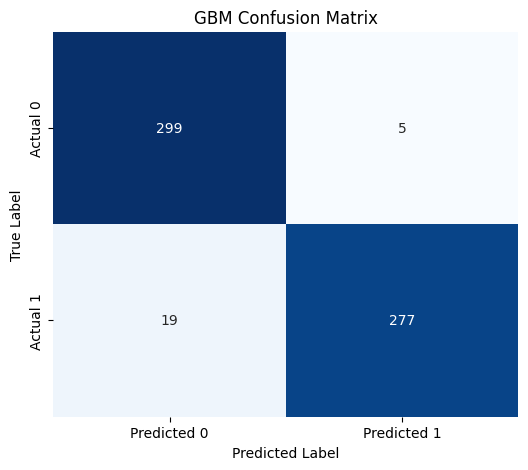

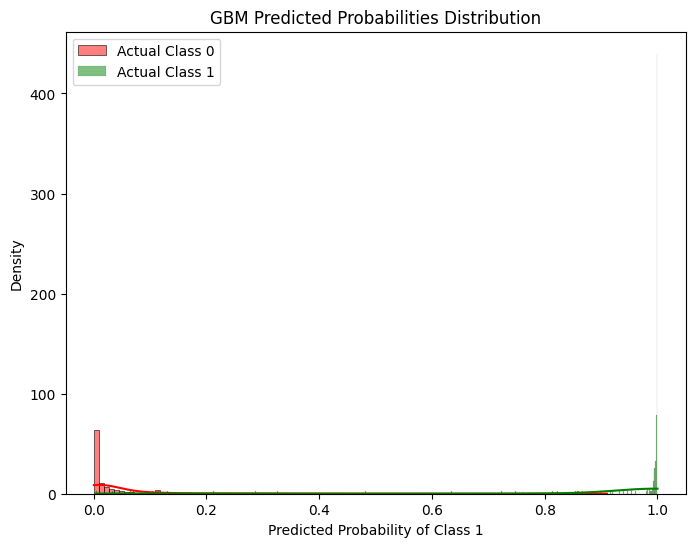

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate predicted labels based on a 0.5 threshold
y_pred_gbm = (gbm_probs >= 0.5).astype(int)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('GBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Distribution of Predicted Probabilities
plt.figure(figsize=(8, 6))
sns.histplot(gbm_probs[y_test == 0], color='red', label='Actual Class 0', kde=True, stat='density', alpha=0.5)
sns.histplot(gbm_probs[y_test == 1], color='green', label='Actual Class 1', kde=True, stat='density', alpha=0.5)
plt.title('GBM Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Density')
plt.legend()
plt.show()

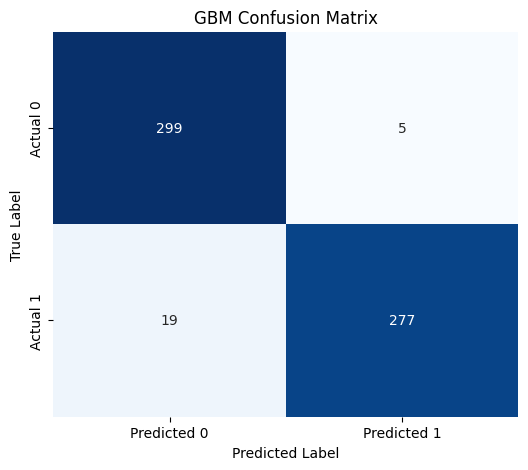

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and gbm_probs are already defined from previous cells
# Calculate predicted labels based on a 0.5 threshold
y_pred_gbm = (gbm_probs >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('GBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

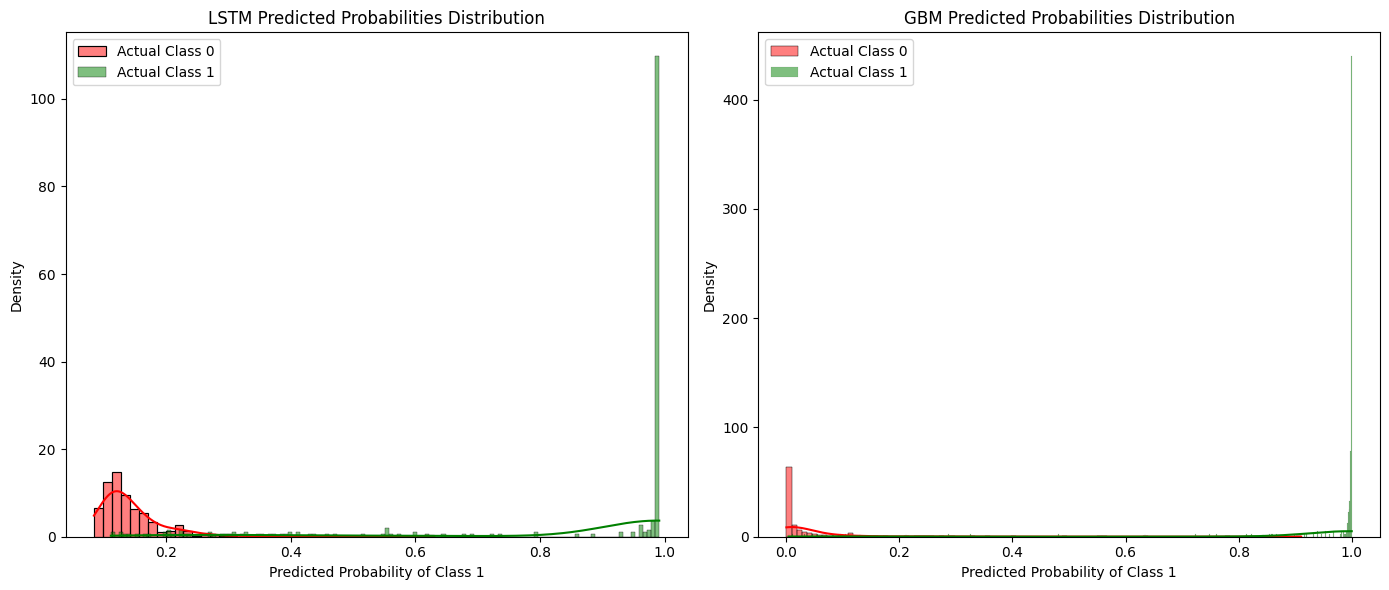

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# LSTM Predicted Probabilities Distribution
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(lstm_probs[y_test == 0], color='red', label='Actual Class 0', kde=True, stat='density', alpha=0.5)
sns.histplot(lstm_probs[y_test == 1], color='green', label='Actual Class 1', kde=True, stat='density', alpha=0.5)
plt.title('LSTM Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Density')
plt.legend()

# GBM Predicted Probabilities Distribution
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(gbm_probs[y_test == 0], color='red', label='Actual Class 0', kde=True, stat='density', alpha=0.5)
sns.histplot(gbm_probs[y_test == 1], color='green', label='Actual Class 1', kde=True, stat='density', alpha=0.5)
plt.title('GBM Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Filter preds_df for high-confidence GBM predictions
high_confidence_gbm_preds = preds_df[
    (preds_df['gbm_prob'] > 0.9) | (preds_df['gbm_prob'] < 0.1)
]

# Display the filtered DataFrame
print("High-confidence GBM Predictions:")
display(high_confidence_gbm_preds.head(10)) # Display first 10 for brevity

High-confidence GBM Predictions:


,text,label,rnn_prob,lstm_prob,gbm_prob
1,mizzzidc if a pair of shoe will put you in a d...,1,0.884383,0.989968,0.999710
2,ugh why did my mum wake me up so early geesh i...,0,0.171252,0.144256,0.000482
3,i hate how i can t do anything but think about...,1,0.848622,0.981424,0.997390
4,edict just been announced no social networking...,0,0.180537,0.158848,0.009859
5,weird feeling hi all i m on my th day is buspi...,1,0.854656,0.990431,0.996705
7,depression make no sense sometimes i have a gr...,1,0.851575,0.990704,0.999979
8,kremsersenf away from tubingen and the germ ye...,0,0.166849,0.148737,0.005640
10,is thinking he s going to have to reinstall wo...,0,0.244000,0.151201,0.005003
11,so i m f and am currently living working and s...,1,0.856973,0.990602,0.999944
13,i know my mind think thing that make no sense ...,1,0.886350,0.990246,0.999893
